In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Specify the file name you uploaded
file_name = "/content/drive/MyDrive/titanic.csv"

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_name)

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling missing data

In [7]:
df = df.drop(columns='Cabin', axis=1)

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [9]:
# Finding the mode value of "Embarkked" Column
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [10]:
print(df['Embarked'].mode()[0]) # 0 is the index

S


In [11]:
# Replacing the missing values in "Embarked" column with the mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Finding the number of people survived and not survived!
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
import seaborn as sns
sns.set()


<Axes: xlabel='Survived', ylabel='count'>

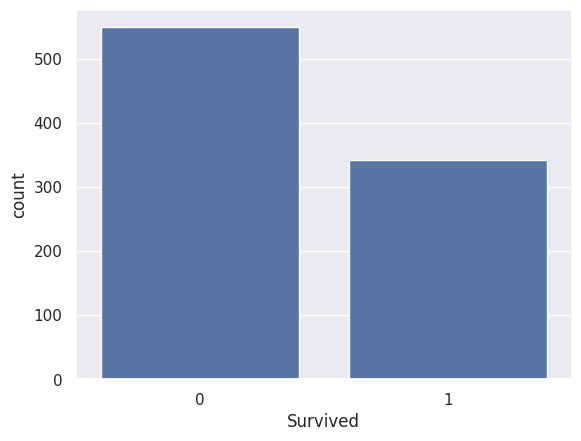

In [16]:
# Count plot for Survived Column
sns.countplot(x='Survived', data=df)

In [17]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

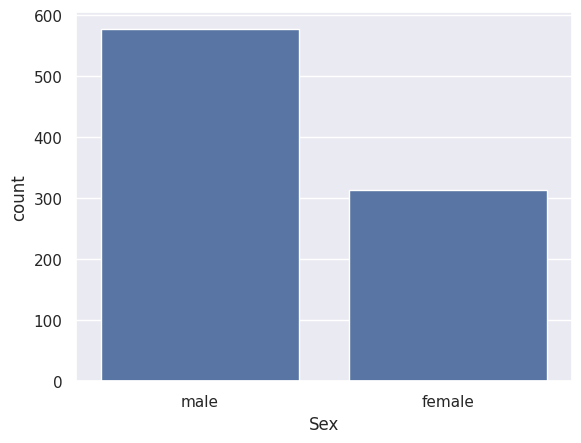

In [18]:
# Count plot for Survived Column
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Sex', ylabel='count'>

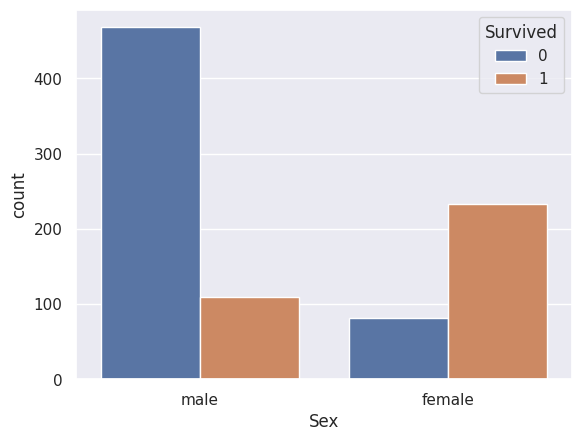

In [19]:
# Number of survivors by Gender wise
sns.countplot(x="Sex", hue="Survived", data=df)

<Axes: xlabel='Pclass', ylabel='count'>

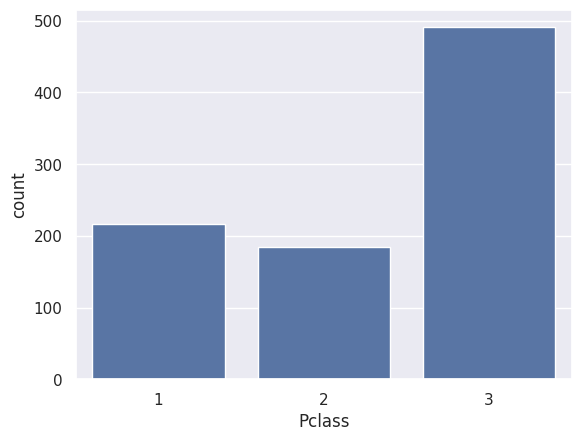

In [20]:
# Creating a Count plot for Pclass Column
sns.countplot(x="Pclass", data=df)

<Axes: xlabel='Pclass', ylabel='count'>

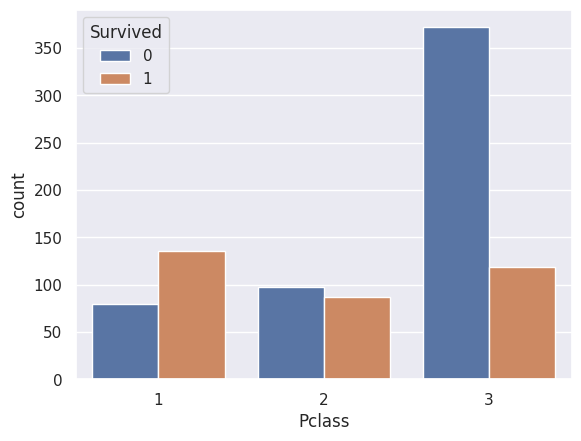

In [21]:
# Number of Survivers by Pclass wise
sns.countplot(x="Pclass", hue="Survived", data=df)

# Encoding the categorial columns

In [22]:
# Converting Categorical Columns
df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# Feature selection

In [24]:
X = df.drop(columns=["PassengerId", "Name", "Ticket", "Survived"], axis=1)
Y = df['Survived']

In [25]:
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(f"Train shapes : X = {X_train.shape}, y = {Y_train.shape}")
print(f"Test shapes  : X = {X_test.shape},  y = {Y_test.shape}\n")

Train shapes : X = (712, 7), y = (712,)
Test shapes  : X = (179, 7),  y = (179,)



# Defining the models and Training them

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [30]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [35]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [36]:
train_classifier(lrc,X_train,Y_train,X_test,Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7821229050279329, 0.8448275862068966)

In [37]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

# Evaluating accuracy

In [38]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)

    print('For ',name)
    print('Accuracy - ',current_accuracy)
    print('Precision- ',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For  SVC
Accuracy -  0.5586592178770949
Precision-  0.0
For  KN
Accuracy -  0.6759776536312849
Precision-  0.6842105263157895
For  NB
Accuracy -  0.6536312849162011
Precision-  0.660377358490566
For  DT
Accuracy -  0.770949720670391
Precision-  0.9130434782608695
For  LR
Accuracy -  0.7821229050279329
Precision-  0.8448275862068966
For  RF
Accuracy -  0.8044692737430168
Precision-  0.8235294117647058
For  AdaBoost
Accuracy -  0.7541899441340782
Precision-  0.7692307692307693
For  BgC
Accuracy -  0.8100558659217877
Precision-  0.8260869565217391
For  ETC
Accuracy -  0.7988826815642458
Precision-  0.8028169014084507
For  GBDT
Accuracy -  0.7877094972067039
Precision-  0.8727272727272727
For  xgb
Accuracy -  0.7821229050279329
Precision-  0.8225806451612904


In [39]:
perform_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_3000ft':accuracy_scores,'Precision_3000ft':precision_scores}).sort_values('Precision_3000ft',ascending=False)

In [40]:
perform_df

,Algorithm,Accuracy_3000ft,Precision_3000ft
3,DT,0.770950,0.913043
9,GBDT,0.787709,0.872727
4,LR,0.782123,0.844828
7,BgC,0.810056,0.826087
5,RF,0.804469,0.823529
10,xgb,0.782123,0.822581
8,ETC,0.798883,0.802817
6,AdaBoost,0.754190,0.769231
1,KN,0.675978,0.684211
2,NB,0.653631,0.660377


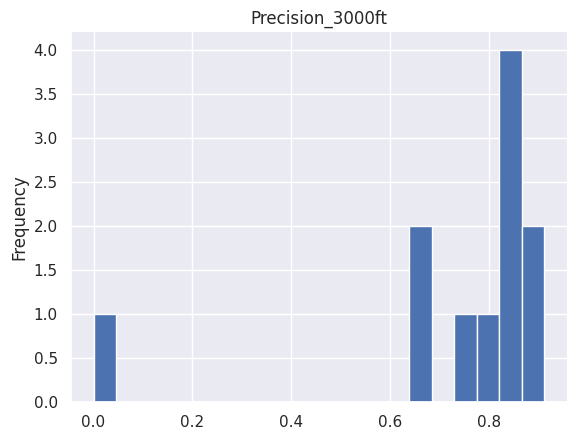

In [42]:
# @title Precision_3000ft

from matplotlib import pyplot as plt
perform_df['Precision_3000ft'].plot(kind='hist', bins=20, title='Precision_3000ft')
plt.gca().spines[['top', 'right',]].set_visible(False)

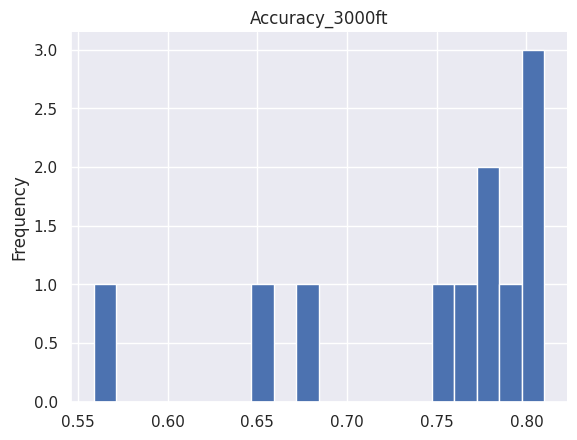

In [41]:
# @title Accuracy_3000ft

from matplotlib import pyplot as plt
perform_df['Accuracy_3000ft'].plot(kind='hist', bins=20, title='Accuracy_3000ft')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [43]:
# To save the model in a pkl file.

import pickle as pkl

pkl.dump(lrc, open('model.pkl', 'wb'))